In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

In [20]:
import os
import pickle
from glob import glob

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

#from scipy.optimize import lsq_linear
#from sklearn.linear_model import LinearRegression

matplotlib.rcParams.update({'font.size': 18, 'figure.facecolor':'white', 'figure.figsize':(8, 8)})

%cd /home/naodell/work/hgcal/ECONAutoencoderStudy

/home/naodell/work/hgcal/ECONAutoencoderStudy


In [21]:
# get the data
input_file = open('data/output_0.pkl', 'rb')
data_dict = pickle.load(input_file)
df_tc = data_dict['tc']
df_gen = data_dict['gen']
df_clusters = data_dict['Threshold0']


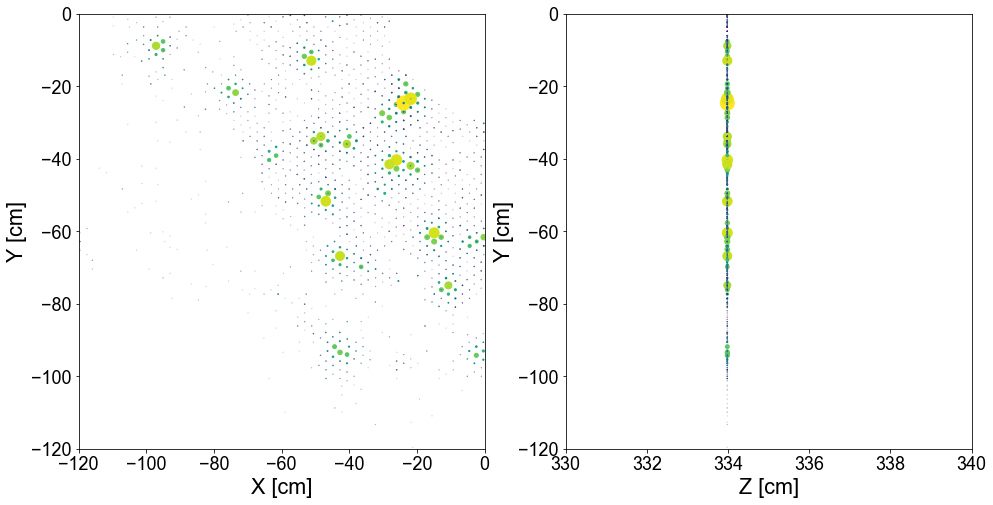

In [22]:
# make some basic plots
fig, axes = plt.subplots(1, 2, facecolor='white', figsize=(16, 8))

cuts = 'tc_z > 0 and tc_x < 0. and tc_y < 0. and tc_subdet == 1 and tc_layer == 9'
event_ix = df_tc.index[0][0]
event_tc = df_tc.query(cuts)
event_cluster = df_clusters.loc[event_ix]
event_gen = df_gen.loc[event_ix]

ax = axes[0]
ax.scatter(event_tc.tc_x, event_tc.tc_y, s=event_tc.tc_energy, c=np.log(event_tc.tc_energy))
ax.set_xlim(-120, 0)
ax.set_ylim(-120, 0)
ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')


#x, y = np.linspace(-100, 100, 50), np.linspace(-100, 100, 50)
#X, Y = np.mgrid[-100:100:5, -100:100:5]
#ax.scatter(X, Y, marker='h', s=70, alpha=0.5)

ax = axes[1]
ax.scatter(event_tc.tc_z, event_tc.tc_y, s=event_tc.tc_energy, c=np.log(event_tc.tc_energy))
ax.set_xlim(330, 340)
ax.set_ylim(-120, 0)
ax.set_xlabel('Z [cm]')
ax.set_ylabel('Y [cm]')

plt.show()

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, cursive


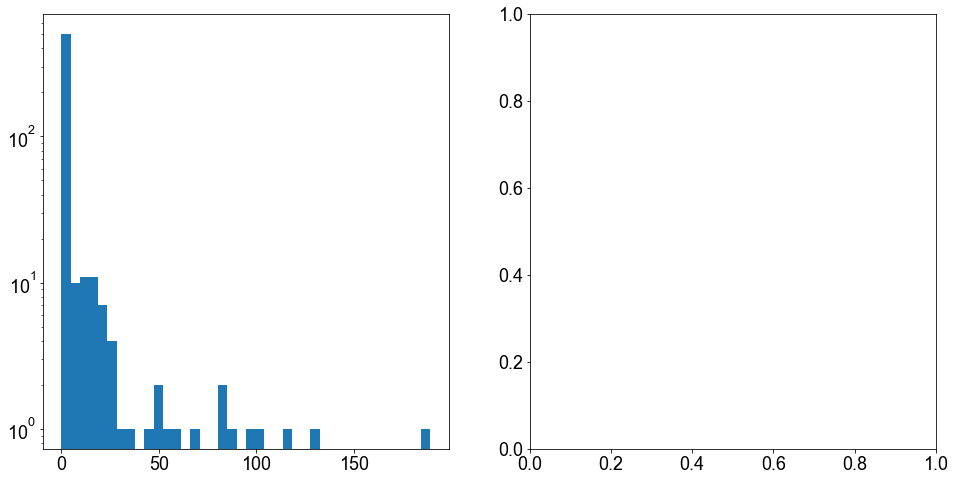

In [23]:
# make some basic plots
fig, axes = plt.subplots(1, 2, facecolor='white', figsize=(16, 8))

ax = axes[0]
ax.hist(event_tc.query('tc_simenergy > 0.1').tc_simenergy, bins=40)
ax.set_yscale('log')
#ax.set_xlim(320, 365)

ax = axes[1]
#ax.hist(

plt.show()

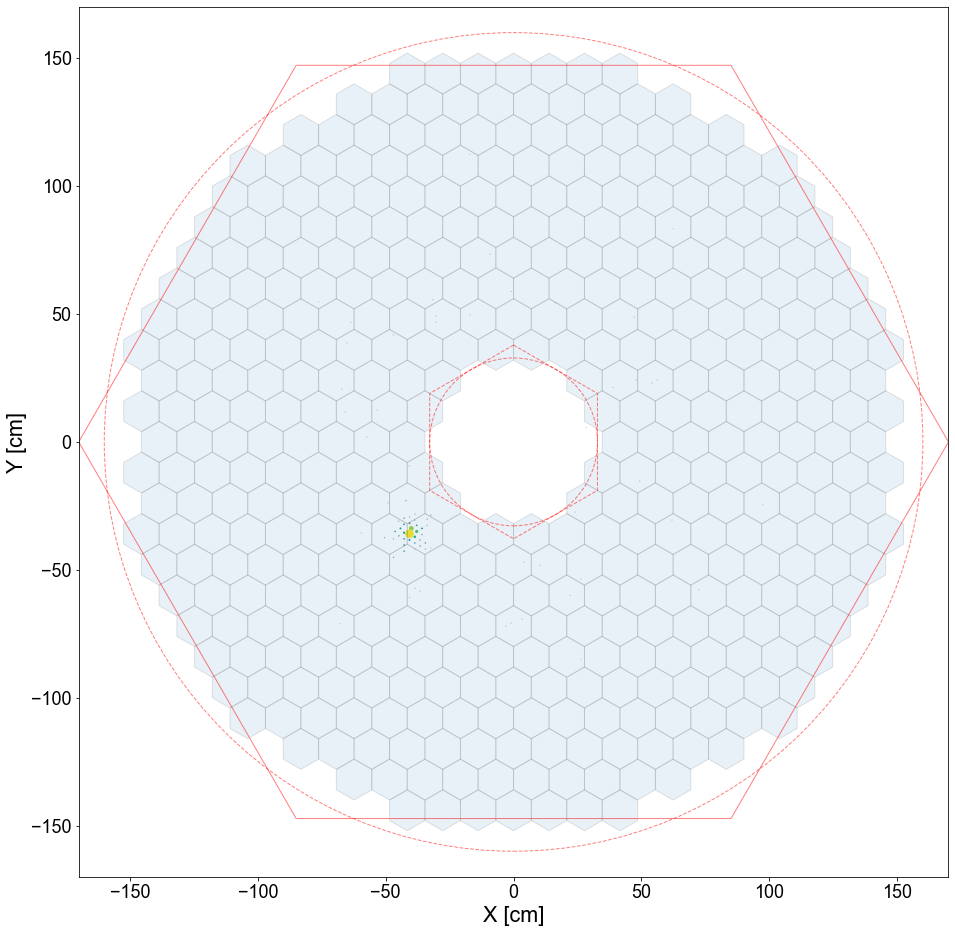

In [144]:
from matplotlib.patches import RegularPolygon, Circle
from itertools import product


#cuts = 'tc_z > 0 and tc_x < 0. and tc_y < 0. and tc_subdet == 1 and tc_layer == 9'
cuts = 'tc_z > 0 and tc_subdet == 1 and tc_layer == 9'
event_ix = df_tc.index[0][0]
event_tc = df_tc.query(cuts).loc[event_ix]
event_cluster = df_clusters.loc[event_ix]
event_gen = df_gen.loc[event_ix]

# draw each module 
u = np.arange(-13, 14)
coord = np.array(list(product(u, u)))
#coord = [(0, 0), (0, 1), (1, 0), (0, -1), (-1, 0), (0, 1), (1, 1), (-1, -1), (0, -1)]

# Horizontal cartesian coords
angle = np.pi/6
hex_radius = 8
d = 2*hex_radius*np.cos(angle)
xcoord = [d*(c[0] - c[1]*np.sin(angle)) for c in coord]
ycoord = [d*c[1]*np.sin(np.pi/2 - angle) for c in coord]

fig, ax = plt.subplots(1, figsize=(16, 16))
ax.set_aspect('equal')

# draw hexegonal grid
for x, y in zip(xcoord, ycoord):
    #color = c[0].lower()  # matplotlib understands lower case words for colours
    r = np.sqrt(x**2 + y**2)
    if r < 32.8 or r > 150:
        continue
        
    poly = RegularPolygon((x, y), 
                         numVertices=6, 
                         radius=hex_radius, 
                         orientation=np.radians(0), 
                         #facecolor=color, 
                         alpha=0.1, 
                         edgecolor='k'
                        )
    ax.add_patch(poly)
    # Also add a text label
    #ax.text(x, y+0.2, l[0], ha='center', va='center', size=20)
    
# inner hexagon
inner_circle = Circle((0, 0), 
                     radius=32.8, 
                     facecolor='none', 
                     alpha=0.5, 
                     linestyle='--',
                     edgecolor='r'
                     )
ax.add_patch(inner_circle)

poly = RegularPolygon((0, 0), 
                     numVertices=6, 
                     radius=32.8/np.cos(angle), 
                     orientation=np.radians(0), 
                     facecolor='none', 
                     alpha=0.5, 
                     linestyle='--',
                     edgecolor='r'
                    )
ax.add_patch(poly)

# outer hexagon
outer_circle = Circle((0, 0), 
                     radius=160, 
                     facecolor='none', 
                     alpha=0.5, 
                     linestyle='--',
                     edgecolor='r'
                     )
ax.add_patch(outer_circle)

poly = RegularPolygon((0, 0), 
                     numVertices=6, 
                     radius=170, 
                     orientation=np.radians(30), 
                     facecolor='none', 
                     alpha=0.5, 
                     edgecolor='r'
                    )
ax.add_patch(poly)

ax.scatter(event_tc.tc_x, event_tc.tc_y, s=event_tc.tc_energy, c=np.log(event_tc.tc_energy))
ax.set_xlim(-170, 170)
ax.set_ylim(-170, 170)
ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')

plt.show()